<a href="https://colab.research.google.com/github/BRIJNANDA1979/Segmenting-Kelp-Forests-/blob/main/Version_3_Unsupervised_Segmentation_using_Kelp_tifs_Kelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use 5 out of 7 bands(exclude 6 and 7 as these are for cloud and DEM)..
find CVI   NDVI   and MNDWI...


In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
test_path = '/content/drive/MyDrive/test_satellite'
train_path = '/content/drive/MyDrive/train_kelp'

In [186]:
import os

In [187]:
test_files_list = os.listdir(test_path)
train_files_list = os.listdir(train_path)

In [188]:
for i in train_files_list:
  s = i.split('_')
  ss = s[0] +'_satellite.tif'
  if ss in test_files_list:
    print(ss)
  #####  Test and train has nothing in common

In [189]:
test_files_list[0:2]

['HP480632_satellite.tif', 'HP504630_satellite.tif']

In [190]:
pip install rasterio

In [191]:
import rasterio
import matplotlib.pyplot as pyplot
from rasterio.plot import show     ####  https://rasterio.readthedocs.io/en/stable/topics/plotting.html

Rasterio also provides rasterio.plot.show() to perform common tasks such as displaying multi-band images as RGB and labeling the axes with proper geo-referenced extents.

Band Order and Detail
1.SWIR (Shortwave Infrared) (int): The SWIR band is useful for distinguishing between different types of vegetation, as well as for detecting moisture content in soil and vegetation. When combined with the green band, it can be used to calculate the Modified Normalized Difference Water Index (MNDWI). The MNDWI is especially useful for identifying the intertidal zone, which can be mistaken for kelp canopy at low tides.

2.NIR (Near-Infrared) (int): The NIR band is essential for vegetation studies, as healthy vegetation reflects a significant amount of NIR light. It is often used to calculate the NDVI (Normalized Difference Vegetation Index), which has been used in past efforts to estimate kelp canopy.

3.Red (int): The red band captures red light from the visible spectrum.

4.Green (int): The green band captures green light from the visible spectrum.

5.Blue (int): The blue band captures blue light from the visible spectrum.

6.Cloud Mask (int): A binary mask identifying the presence (1) or absence (0) of clouds.

7.Digital Elevation Map (int): The Digital Elevation Model (DEM) is generated from ASTER data and can be used to generate a land mask. Values represent meters above sea-level and start at 0.

In [192]:
from rasterio.plot import show_hist

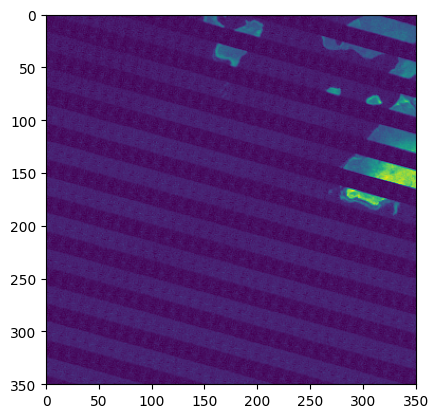

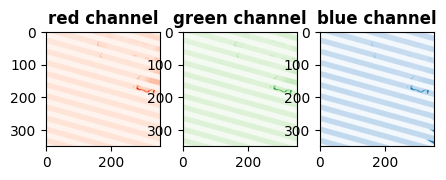

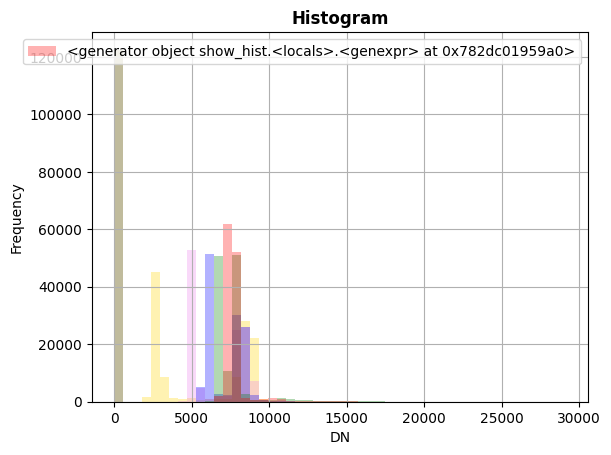

{'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 350, 'height': 350, 'count': 7, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
(350, 350)
(350, 350)
(350, 350)
(350, 350)
(350, 350)


In [193]:
for i in test_files_list:                                  ##### Analysing one Satellitr image data to data_array with 5 BANDS
  with rasterio.open(test_path+'/'+i) as src:
    show(src)
    fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(5,5))
    show((src, 3), ax=axr, cmap='Reds', title='red channel')
    show((src, 4), ax=axg, cmap='Greens', title='green channel')
    show((src, 5), ax=axb, cmap='Blues', title='blue channel')
    pyplot.show()

    show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")
    print(src.meta)
    for band in range(1,6):                    ###########   Exclude 6 and 7
      data_array = src.read(band)
      print(data_array.shape)
  break


In [194]:
XX = []
for i in test_files_list:
  with rasterio.open(test_path+'/'+i) as src:
    for band in range(1,6):                    ###########   Exclude 6 and 7
      datarray = src.read(band)
      XX.append(datarray)

In [195]:
len(test_files_list)

1426

In [196]:
test_files_list[0:2]

['HP480632_satellite.tif', 'HP504630_satellite.tif']

In [197]:
import numpy as np

In [198]:
len(XX)                 ### 1426 * 5 = 7130

7130

In [199]:
XXX = np.array(XX)    ### convert list XX into array

In [200]:
XXX.shape

(7130, 350, 350)

In [201]:
pip install earthpy

In [202]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [203]:
#### read 5 bands of first test file
test_files_list[0]

'HP480632_satellite.tif'

In [204]:
# Landsat 8 red band is band 4 at [3]
# Landsat 8 near-infrared band is band 5 at [4]
SWIR = XXX[0]                ### 5 bands of "   HP480632_satellite.tif   "
NIR = XXX[1]
RED = XXX[2]
GREEN = XXX[3]
BLUE = XXX[4]
ndvi = es.normalized_diff(NIR,RED)
mndwi = es.normalized_diff(GREEN,SWIR)
CVI = es.normalized_diff(NIR,GREEN)               ########  EVI = G * ((NIR - R) / (NIR + C1 * R – C2 * B + L))
EVI = GREEN *((NIR -RED)/(NIR + 6*RED - 7.5*BLUE + 1))

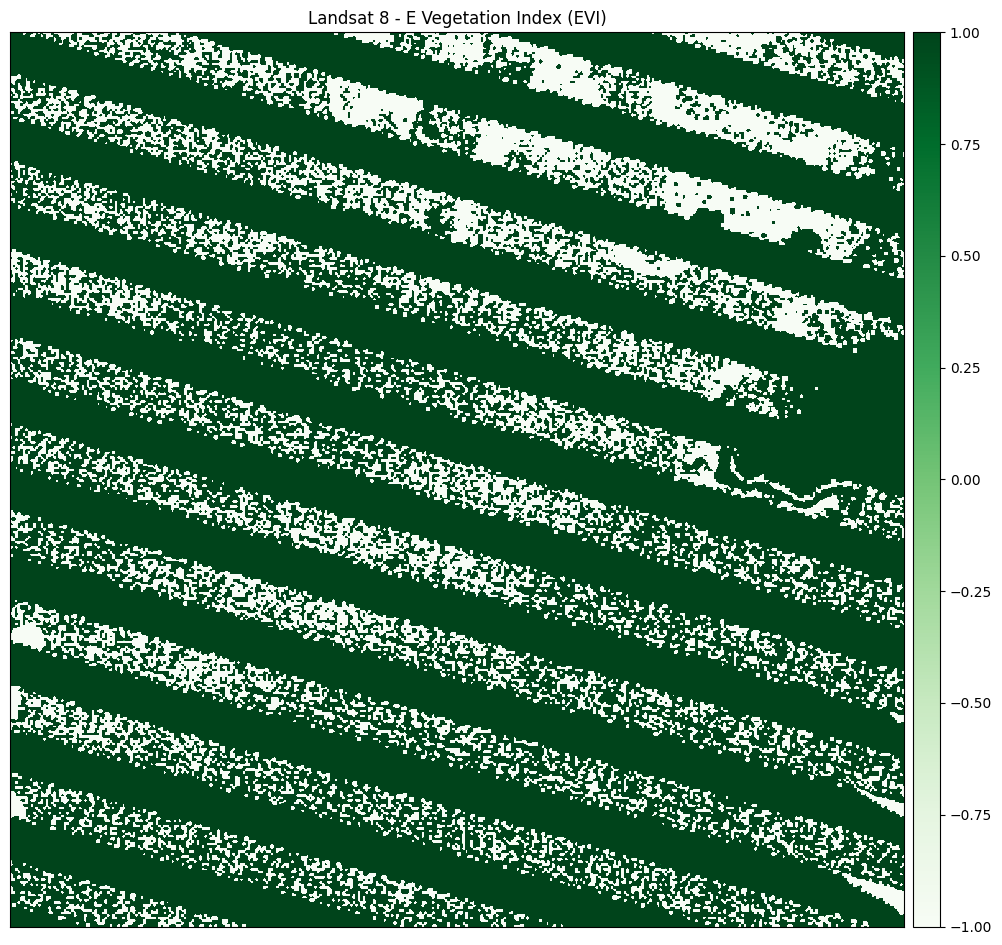

<Axes: title={'center': 'Landsat 8 - E Vegetation Index (EVI)'}>

In [205]:
titles = ["Landsat 8 - E Vegetation Index (EVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(EVI, cmap="Greens", cols=1, title=titles, vmin=-1, vmax=1)

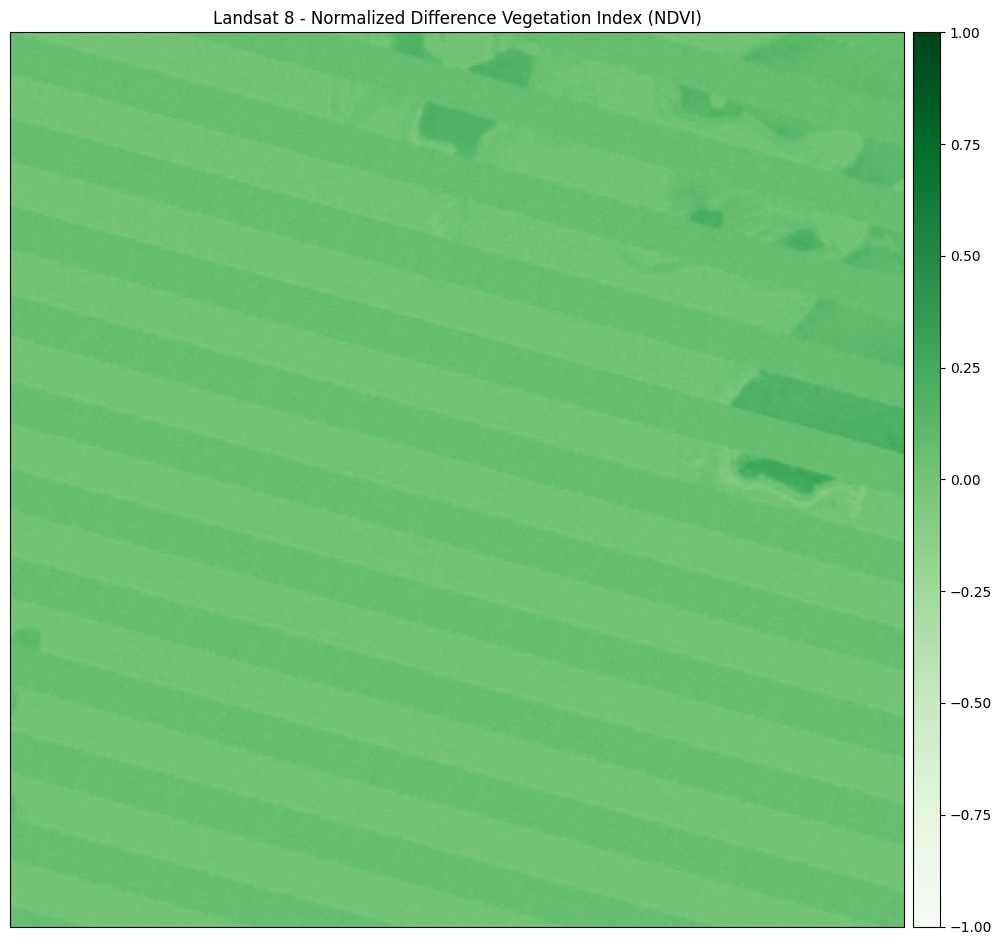

<Axes: title={'center': 'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [206]:
titles = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="Greens", cols=1, title=titles, vmin=-1, vmax=1)

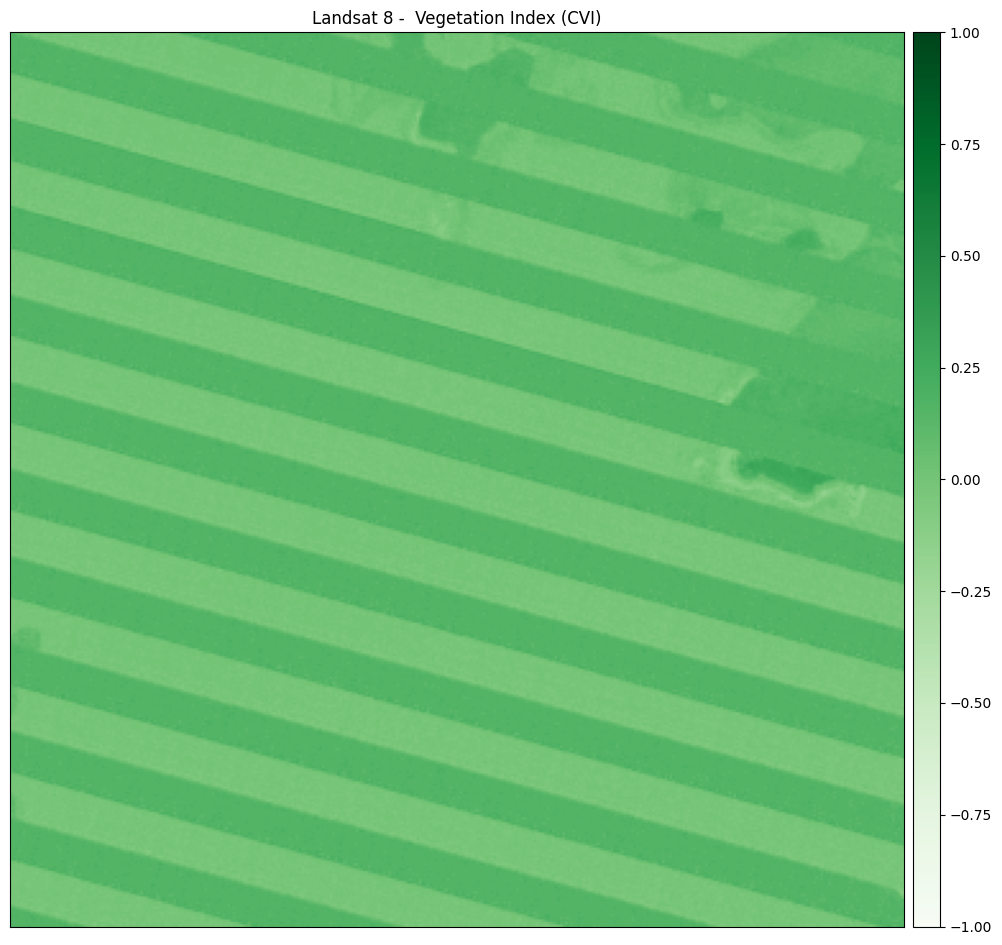

<Axes: title={'center': 'Landsat 8 -  Vegetation Index (CVI)'}>

In [207]:
titles = ["Landsat 8 -  Vegetation Index (CVI)"]

# Turn off bytescale scaling due to float values for EVI
ep.plot_bands(CVI, cmap="Greens", cols=1, title=titles, vmin=-1, vmax=1)

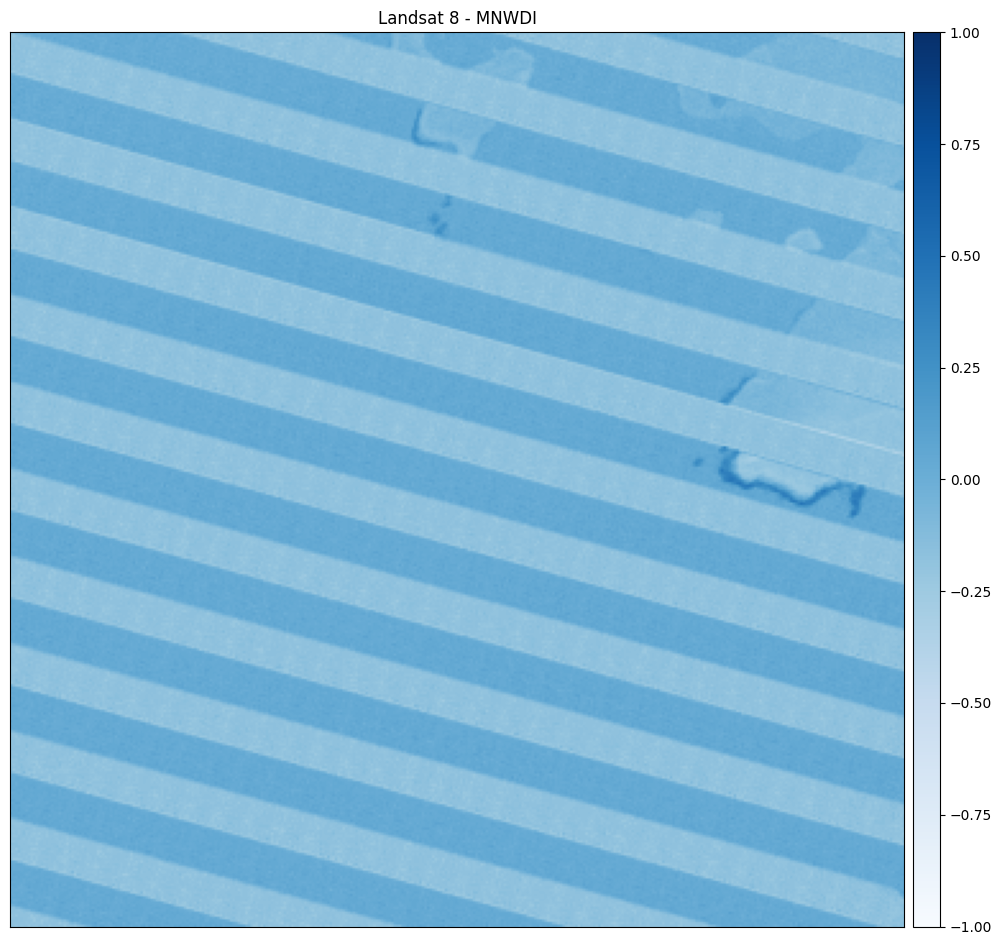

<Axes: title={'center': 'Landsat 8 - MNWDI'}>

In [208]:
titles = ["Landsat 8 - MNWDI"]

# Turn off bytescale scaling due to float values for MNWDI
ep.plot_bands(mndwi, cmap="Blues", cols=1, title=titles, vmin=-1, vmax=1)

In [209]:
# Create classes and apply to NDVI results
EVI_class_bins = [-np.inf, 0, 0.50, 0.75, 0.90, np.inf]    ##### changing
EVI_landsat_class = np.digitize(EVI, EVI_class_bins)      #### https://www.geeksforgeeks.org/python-numpy-np-digitize-method/

# Apply the nodata mask to the newly classified NDVI data
EVI_landsat_class = np.ma.masked_where(
    np.ma.getmask(EVI), EVI_landsat_class
)
np.unique(EVI_landsat_class)

masked_array(data=[1, 5],
             mask=False,
       fill_value=999999)

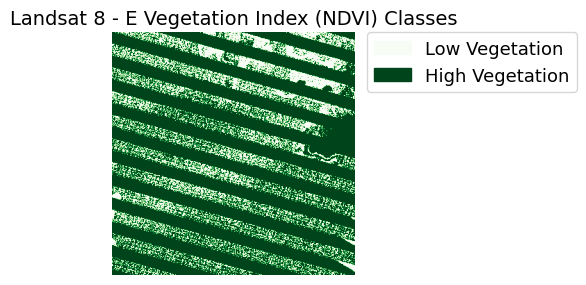

In [265]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
EVI_cat_names = [

    "Low Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(EVI_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:4]

# Plot your data
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(EVI_landsat_class, cmap='Greens')

ep.draw_legend(im_ax=im, classes=classes, titles=EVI_cat_names)
ax.set_title(
    "Landsat 8 - E Vegetation Index  Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [267]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]    ##### changing
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)      #### https://www.geeksforgeeks.org/python-numpy-np-digitize-method/

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[1, 2, 3, 4],
             mask=False,
       fill_value=999999)

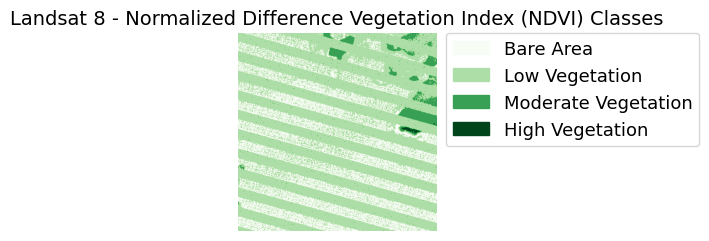

In [268]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:4]

# Plot your data
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(ndvi_landsat_class, cmap='Greens')

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [269]:
# Create classes and apply to NDVI results
CVI_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]    ##### changing
CVI_landsat_class = np.digitize(CVI, CVI_class_bins)

# Apply the nodata mask to the newly classified NDVI data
CVI_landsat_class = np.ma.masked_where(
    np.ma.getmask(CVI), CVI_landsat_class
)
np.unique(CVI_landsat_class)

masked_array(data=[1, 2, 3, 4],
             mask=False,
       fill_value=999999)

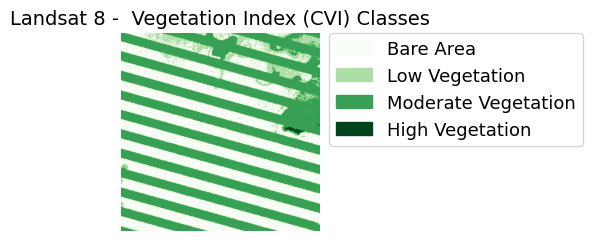

In [270]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
CVI_cat_names = [
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(CVI_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:4]

# Plot your data
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(CVI_landsat_class, cmap='Greens')

ep.draw_legend(im_ax=im, classes=classes, titles=CVI_cat_names)
ax.set_title(
    "Landsat 8 -  Vegetation Index (CVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [215]:
ndvi.shape

(350, 350)

In [216]:
print(ndvi.min())
print(CVI.min())
print(EVI.min())


-0.12474186886938565
-0.18538548610237707
-7047722.0


In [217]:
print(ndvi.max())
print(CVI.max())
print(EVI.max())

0.31475252282556465
0.32738816103343243
16773791.0


In [218]:
print(ndvi.mean())
print(CVI.mean())
print(EVI.mean())

0.03751749611602948
0.07510520716596966
2549.5061521212297


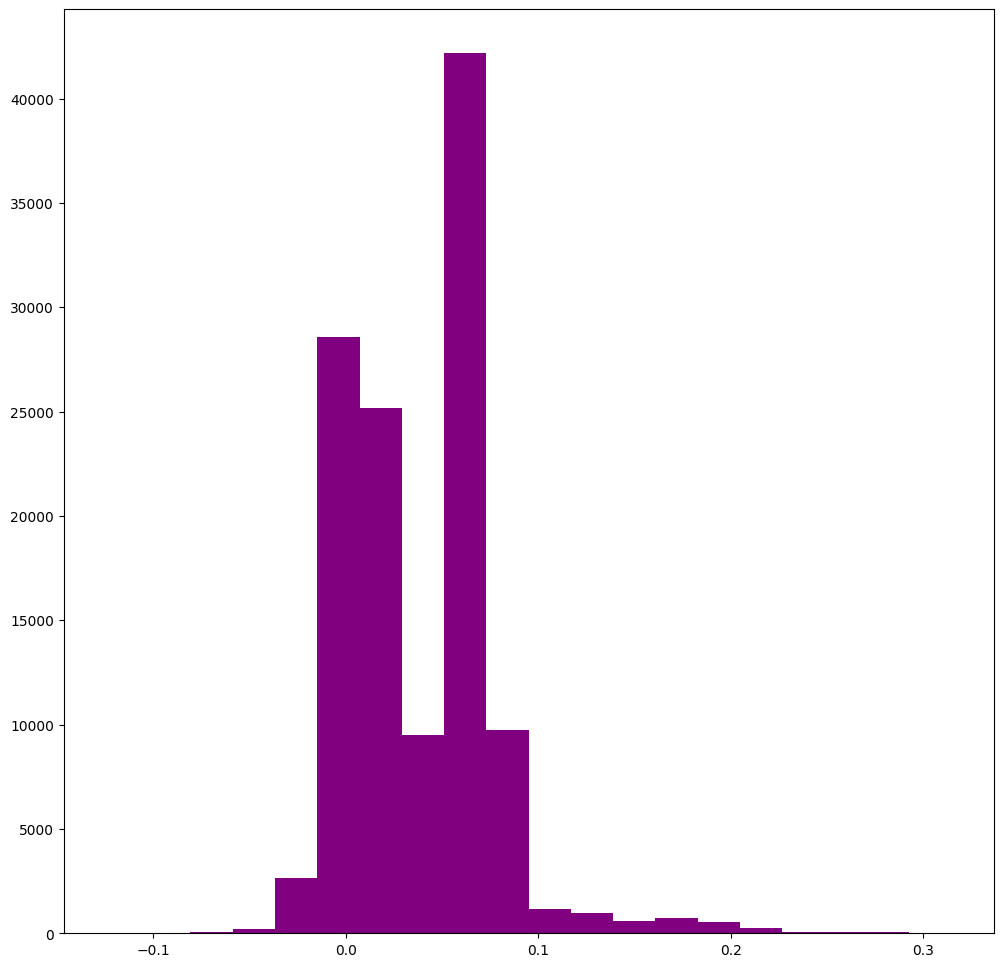

In [219]:
ep.hist(ndvi)
plt.show()

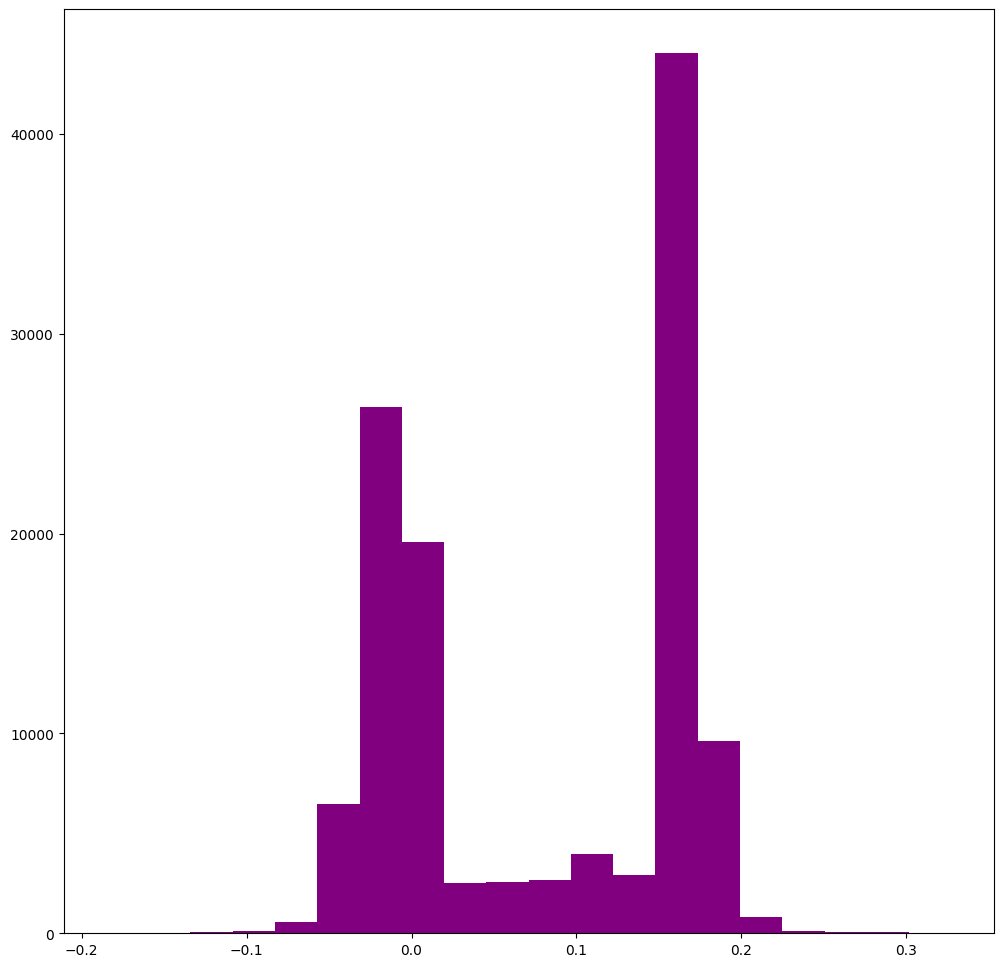

In [220]:
ep.hist(CVI)
plt.show()

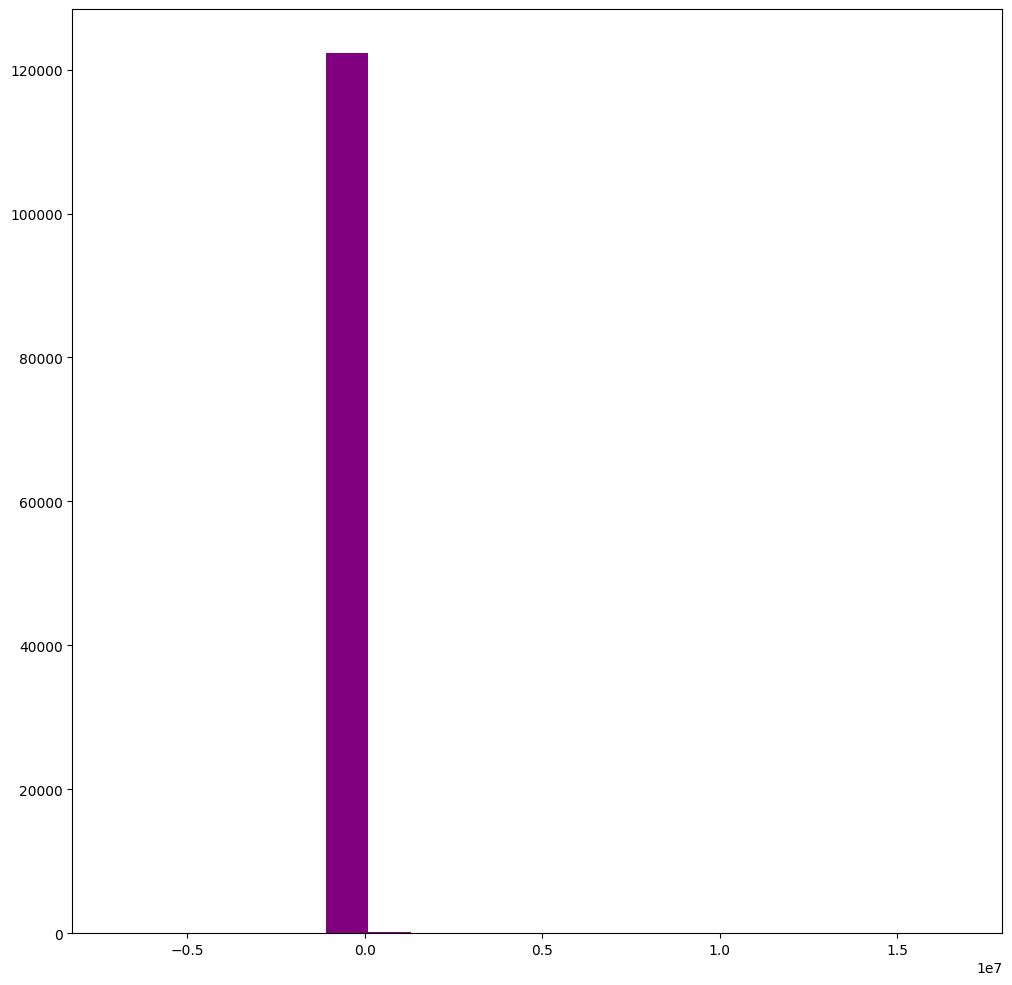

In [221]:
ep.hist(EVI)
plt.show()

In [222]:
import pandas as pd

In [223]:
flat_ndvi = ndvi.flatten()
flat_CVI = CVI.flatten()
flat_EVI = EVI.flatten()

In [224]:
df = pd.DataFrame()

In [225]:
df['ndvi'] = flat_ndvi
df['CVI'] = flat_CVI
df['EVI'] = flat_EVI

In [226]:
df.describe()

ndvi            CVI           EVI
count  122500.000000  122500.000000  1.225000e+05
mean        0.037517       0.075105  2.549506e+03
std         0.040461       0.086340  2.194215e+05
min        -0.124742      -0.185385 -7.047722e+06
25%         0.003490      -0.021581  8.775502e+01
50%         0.041459       0.102413  1.620701e+02
75%         0.063002       0.154937  1.814414e+02
max         0.314753       0.327388  1.677379e+07

In [227]:
df.head()

ndvi       CVI         EVI
0  0.084572  0.143584  341.772938
1  0.063078  0.143584  362.578885
2  0.042419  0.083836  393.976945
3  0.024194  0.076967  310.444900
4  0.005839  0.026157  542.681579

In [228]:
nd =df[df['ndvi'] > 0.25]
CV=df[df['CVI'] > 0.25]
MV = df[df['EVI'] > 0.75]


In [229]:
nd[:].value_counts().sum()

147

In [230]:
CV[:].value_counts().sum()

166

In [231]:
MV[:].value_counts().sum()

94512

In [232]:
# Create classes and apply to EVI results
EVI_class_bins = [0.75, 0.90]    ##### changing
EVI_landsat_class = np.digitize(EVI, EVI_class_bins)      #### https://www.geeksforgeeks.org/python-numpy-np-digitize-method/

# Apply the nodata mask to the newly classified NDVI data
EVI_landsat_class = np.ma.masked_where(
    np.ma.getmask(EVI), EVI_landsat_class
)
np.unique(EVI_landsat_class)

masked_array(data=[0, 2],
             mask=False,
       fill_value=999999)

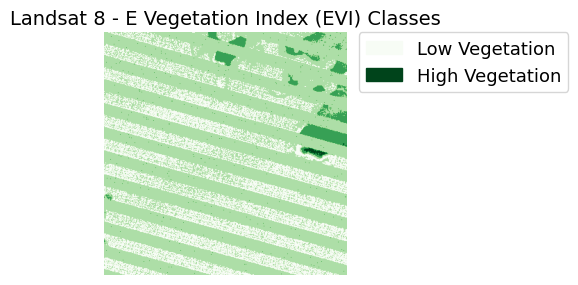

In [271]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
EVI_cat_names = [
    "Low Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(EVI_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:2]

# Plot your data
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(ndvi_landsat_class, cmap='Greens')

ep.draw_legend(im_ax=im, classes=classes, titles=EVI_cat_names)
ax.set_title(
    "Landsat 8 - E Vegetation Index (EVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [234]:
# Create classes and apply to NDVI results
ndvi_class_bins = [0.25, 0.4, np.inf]    ##### changing
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)      #### https://www.geeksforgeeks.org/python-numpy-np-digitize-method/

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[0, 1],
             mask=False,
       fill_value=999999)

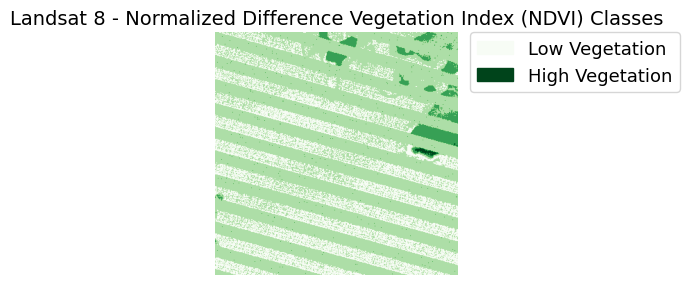

In [272]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "Low Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:2]

# Plot your data
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(ndvi_landsat_class, cmap='Greens')

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

1426 TEST Satellite images  choosing 5 out of 7 bands

In [236]:
data_array.shape

(350, 350)

In [237]:
def masking(X, Y):

  # here Y is the mask e.g NDVI_binary

  mask = np.ma.masked_where(Y,X)

  return mask

In [238]:
import numpy.ma as ma

[0 1]


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


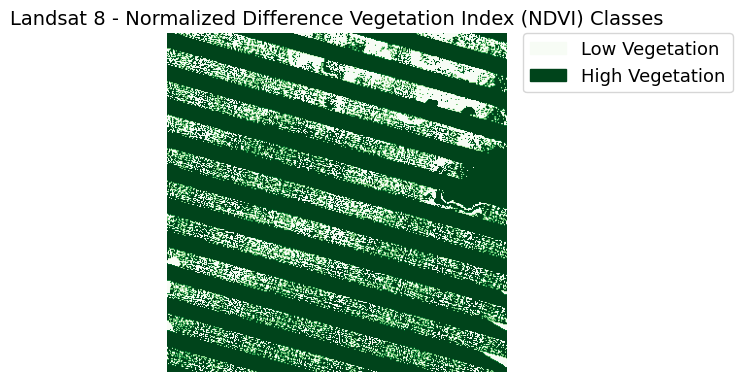

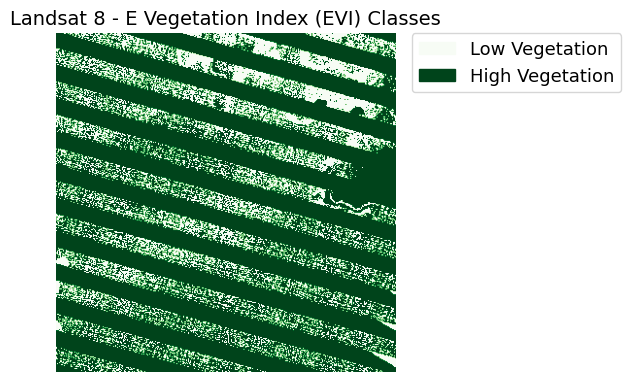

[[6067 6335 6603 ... 6068 6068 6068]
 [6067 6067 6335 ... 6068 6068 6068]
 [6067 6067 6067 ... 6068 6068 6068]
 ...
 [6068 6068 6068 ... 6335 6335 6335]
 [6068 6068 6068 ... 6068 6068 6335]
 [6068 6068 6068 ... 6068 6068 6068]]


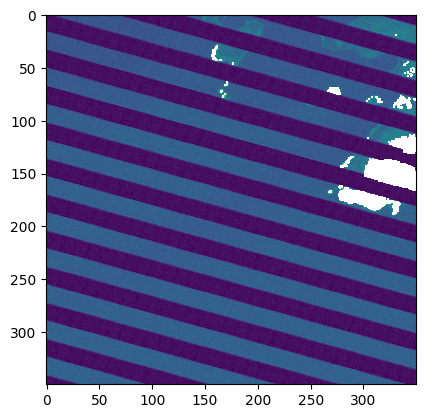

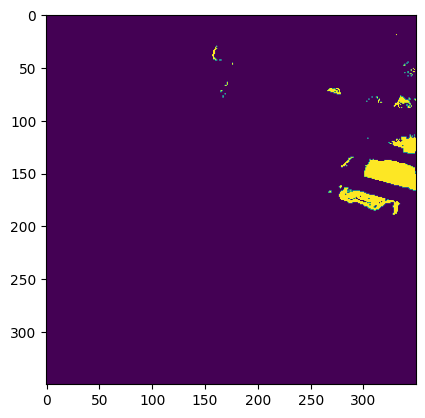

HP480632_satellite1.tif
HP480632_satellite2.tif
HP480632_satellite3.tif
HP480632_satellite4.tif
HP480632_satellite5.tif
HP480632_satellite6.tif
HP480632_satellite7.tif


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [239]:
stop =0
for i in test_files_list:                                  ##### POPULATE all data to data_array with 7 BANDS
  with rasterio.open(test_path+'/'+i) as src:
                                                      ###########
    data_array = src.read([1,2,3,4,5,6,7])                    #####  HP480632_satellite.tif
    XXX  = data_array
    SWIR = XXX[0]
    NIR = XXX[1]
    RED = XXX[2]
    GREEN = XXX[3]
    BLUE = XXX[4]
    CLOUD = XXX[5]
    DEM = XXX[6]
    ndvi = es.normalized_diff(NIR,RED)
    mndwi = es.normalized_diff(GREEN,SWIR)
    EVI = GREEN *((NIR -RED)/(NIR + 6*RED - 7.5*BLUE + 1))

    CVI = es.normalized_diff(NIR,GREEN)
    EVI_class_bins = [0.75, 0.90]    ##### changing
    EVI_landsat_class = np.digitize(EVI, EVI_class_bins)
    # Apply the nodata mask to the newly classified and NDVI EVI data
    EVI_landsat_class = np.ma.masked_where(
    np.ma.getmask(EVI), EVI_landsat_class)
    np.unique(EVI_landsat_class)

    ndvi_class_bins = [0.25,1]
    # Define class names
    ndvi_cat_names = [
                      "Low Vegetation",
                      "High Vegetation",
                     ]
    ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)
    ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
    )
    classes_ndvi = np.unique(ndvi_landsat_class)
    print(classes_ndvi)
    classes_ndvi = classes_ndvi.tolist()
    if(len(classes_ndvi) < 2):
      Rejected_test_satellite_files.append(i)
      continue

    EVI_cat_names = [
                      "Low Vegetation",
                      "High Vegetation",
                     ]

    classes_EVI = EVI_landsat_class[0:2]
    if(len(classes_EVI) < 2):
      Rejected_test_satellite_files.append(i)
      continue
    classes_ndvi = classes_ndvi[0:2]
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(EVI_landsat_class, cmap='Greens')
    ep.draw_legend(im_ax=im, classes=classes_EVI, titles=EVI_cat_names)
    ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
    )
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(EVI_landsat_class, cmap='Greens')
    ep.draw_legend(im_ax=im, classes=classes_EVI, titles=EVI_cat_names)
    ax.set_title(
    "Landsat 8 - E Vegetation Index (EVI) Classes",
    fontsize=14,
    )
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

    EVI_binary  = np.digitize(EVI,EVI_class_bins)
    masked_EVI_binary = masking(EVI,CLOUD)

    NDVI_binary = np.digitize(ndvi, ndvi_class_bins)    ### Masking EVI_binary with CLOUD
    masked_NDVI_binary= masking(NDVI_binary,CLOUD)
    # calling masking function to get
    # masked array
    masked_RED_EVI= masking(RED,masked_EVI_binary)
    masked_GREEN_EVI= masking(GREEN,masked_EVI_binary)
    masked_BLUE_EVI= masking(BLUE,masked_EVI_binary)
    masked_SWIR_EVI= masking(SWIR,masked_EVI_binary)
    masked_NIR_EVI= masking(NIR,masked_EVI_binary)
    masked_CLOUD_EVI= masking(CLOUD,masked_EVI_binary)
    masked_DEM_EVI= masking(DEM,masked_EVI_binary)
    NIR_output_EVI  = ma.getmask(masked_NIR_EVI)
    RED_output_EVI = ma.getmask(masked_RED_EVI)
    GREEN_output_EVI = ma.getmask(masked_GREEN_EVI)
    BLUE_output_EVI = ma.getmask(masked_BLUE_EVI)
    SWIR_output_EVI = ma.getmask(masked_SWIR_EVI)
    CLOUD_output_EVI = ma.getmask(masked_CLOUD_EVI)
    DEM_output_EVI = ma.getmask(masked_DEM_EVI)

    masked_RED= masking(RED,masked_NDVI_binary)       ##### masked_NDVI_binary masking
    masked_GREEN= masking(GREEN,masked_NDVI_binary)
    masked_BLUE= masking(BLUE,masked_NDVI_binary)
    masked_SWIR= masking(SWIR,masked_NDVI_binary)
    masked_NIR= masking(NIR,masked_NDVI_binary)
    masked_CLOUD= masking(CLOUD,masked_NDVI_binary)
    masked_DEM= masking(DEM,masked_NDVI_binary)
    NIR_output  = ma.getmask(masked_NIR)
    RED_output = ma.getmask(masked_RED)
    GREEN_output = ma.getmask(masked_GREEN)
    BLUE_output = ma.getmask(masked_BLUE)
    SWIR_output = ma.getmask(masked_SWIR)
    CLOUD_output = ma.getmask(masked_CLOUD)
    DEM_output = ma.getmask(masked_DEM)
    print(masked_RED)
    show(masked_RED)
    show(ma.getmask(masked_RED))
    ####  Writing output files for each band after applying NDVI_binary mask.....
    with rasterio.Env():

      # Write an array as a raster band to a new 8-bit file. For
      # the new file's profile, we start with the profile of the source
      profile = src.profile

      # And then change the band count to 1, set the
      # dtype to uint8, and specify LZW compression.
      profile.update(
        dtype=rasterio.uint8,
        count=1,
        compress='lzw')
      masked_BANDS_ndvi = [SWIR_output,NIR_output,RED_output,GREEN_output,BLUE_output,CLOUD_output,DEM_output]
      masked_BANDS_EVI = [SWIR_output_EVI,NIR_output_EVI,RED_output_EVI,GREEN_output_EVI,BLUE_output_EVI,CLOUD_output_EVI,DEM_output_EVI]
      for band in range(1,8):
        s = i.split('_')
        ss = s[0] + '_satellite' + str(band) + '.tif'
        print(ss)
        array = masked_BANDS_ndvi[band-1]
        array_EVI = masked_BANDS_EVI[band-1]
        with rasterio.open('/content/sample_data/ndvi_kelp/' + ss, 'w', **profile) as dst:
          dst.write(array.astype(rasterio.uint8), 1)
        with rasterio.open('/content/sample_data/EVI_KELP/' + ss, 'w', **profile) as dst:
          dst.write(array_EVI.astype(rasterio.uint8), 1)
      stop = stop +1
      if stop ==1:
        break


https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/20a_pixel_classification/scikit_learn_random_forest_pixel_classifier.html


Random forest  experiment failed for this ....


Clustering with k=3
verifying ndvi output with individual band e.g SWIR

In [241]:
####    https://www.acgeospatial.co.uk/k-means-sentinel-2-python/

In [273]:
import numpy as np
from sklearn import cluster

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



BAND is --->   0


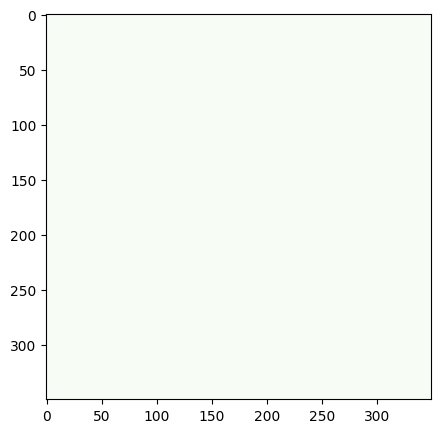

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



BAND is --->   1


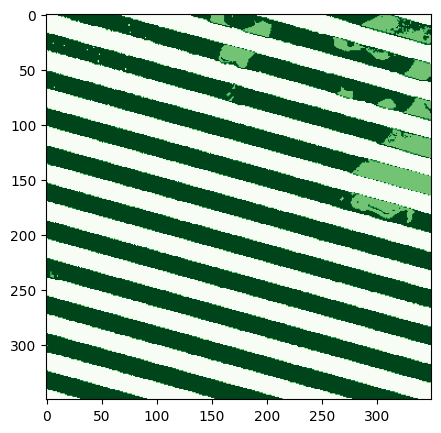

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



BAND is --->   2


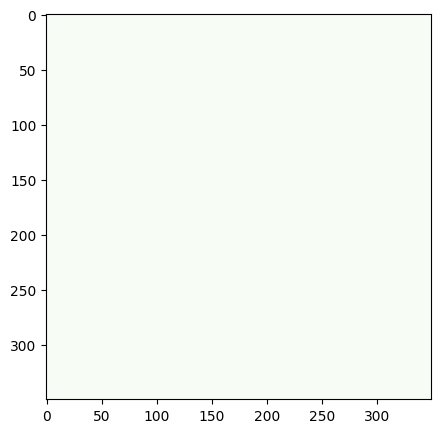

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



BAND is --->   3


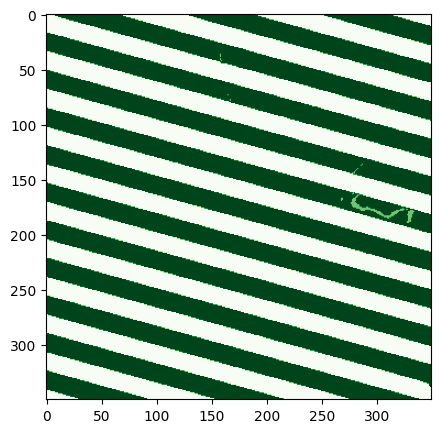

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



BAND is --->   4


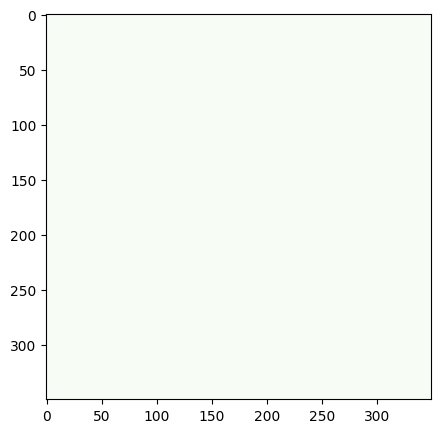

In [290]:
with rasterio.open(test_path +'/'+ 'HP480632_satellite.tif') as src:         ###########        HP480632_satellite.tif   ###
    data_array = src.read([1,2,3,4,5,6,7])
    XXX  = data_array
    SWIR = XXX[0]
    NIR = XXX[1]
    RED = XXX[2]
    GREEN = XXX[3]
    BLUE = XXX[4]
    CLOUD = XXX[5]
    DEM = XXX[6]

masked = [masked_SWIR,masked_NIR,masked_RED,masked_GREEN,masked_BLUE]
for i in range(0,5):

  img_masked = masked[i]
  X_masked= img_masked.reshape((-1,1))

  img = XXX[i]
  X= img.reshape((-1,1))

  k_means = cluster.KMeans(n_clusters=3)
  k_means.fit(X)

  k_means_masked= cluster.KMeans(n_clusters=3)
  k_means_masked.fit(X_masked)

  X_cluster_masked = k_means_masked.labels_
  X_cluster_masked = X_cluster_masked.reshape(img_masked.shape)

  X_cluster = k_means.labels_
  X_cluster = X_cluster.reshape(img.shape)

  Change =  X_cluster_masked - X_cluster    ### if change = 0 ACCEpt band for kelp
  print('')
  print('BAND is --->   ' + str(i))
  plt.figure(figsize=(5,5))
  plt.imshow(Change, cmap="Greens")
  plt.show()

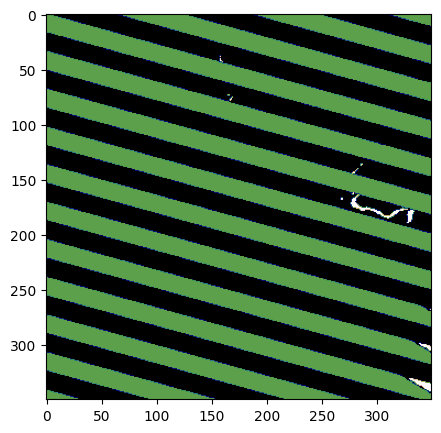

In [275]:
plt.figure(figsize=(5,5))
plt.imshow(X_cluster_masked, cmap="gist_earth")
plt.show()

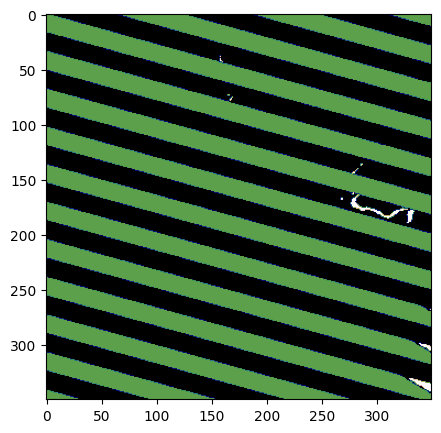

In [279]:
plt.figure(figsize=(5,5))
plt.imshow(X_cluster, cmap="gist_earth")
plt.show()

In [282]:
Change =  X_cluster_masked - X_cluster    ### if change = 0 ACCEpt band for kelp

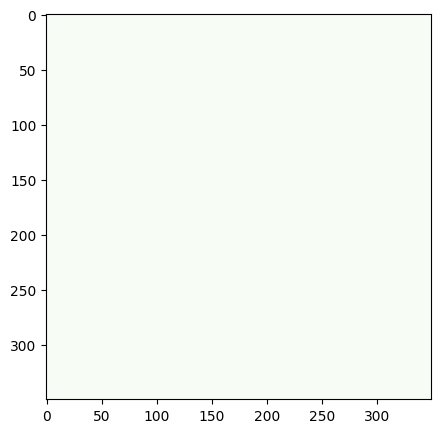

In [283]:
plt.figure(figsize=(5,5))    #### clearly change is Zer0... so SWIR can predict Canopy as predicted by NDVI
plt.imshow(Change, cmap="Greens")
plt.show()

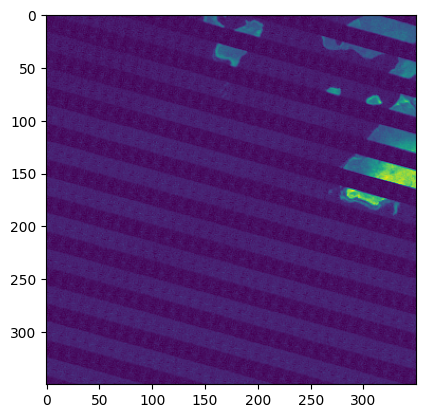

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

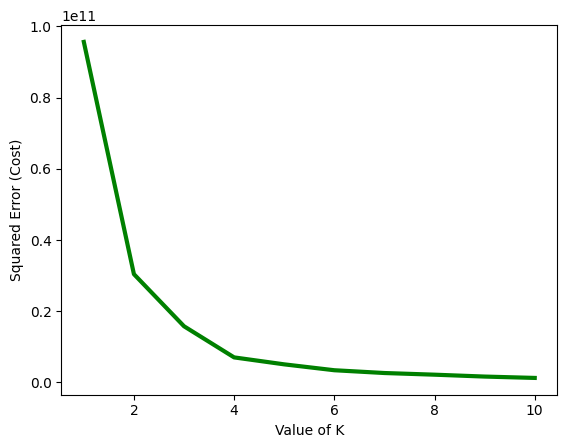

In [258]:
show(SWIR)
X = SWIR.reshape((-1,1))
cost =[]
for i in range(1, 11):
  KM = KMeans(n_clusters = i, max_iter = 500)
  KM.fit(X)

    # calculates squared error
    # for the clustered points
  cost.append(KM.inertia_)
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot


# the point of the elbow is the
# most optimal value for choosing k

In [262]:
k_means_SWIR = cluster.KMeans(n_clusters=3)   ###  Try k with 3 4 and 5 for least errors....
k_means_SWIR.fit(X_SWIR)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [263]:
X_cluster_SWIR = k_means_SWIR.labels_
X_cluster_SWIR = X_cluster_SWIR.reshape(img_SWIR.shape)

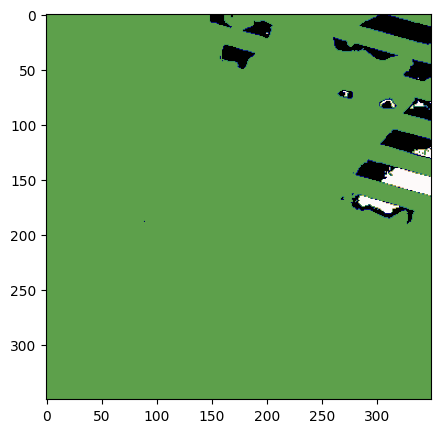

In [264]:

plt.figure(figsize=(5,5))
plt.imshow(X_cluster_SWIR, cmap="gist_earth")
plt.show()